In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scanpy as sc
import seaborn as sns
from tqdm import tqdm
#import squidpy as sq
from scipy.stats import spearmanr
import random
# Set font to Arial
plt.rcParams["font.family"] = "Arial"
random.seed(10)
print(random.random())
sc.settings.verbosity = 1
sns.set(font_scale=1)
sc.settings.set_figure_params(dpi=150)
sns.set_style("ticks")

from matplotlib import cm
from matplotlib.colors import ListedColormap

cm_color = cm.get_cmap("Reds", 128)
cm_grey = cm.get_cmap("Greys", 128)

Reds = ListedColormap(np.vstack((
    cm_grey(np.linspace(0.2, 0.2, 1)),
    cm_color(np.linspace(0.1, 1, 128)),
)))

0.5714025946899135


<ipython-input-1-aaa6846a5d3f>:22: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cm_color = cm.get_cmap("Reds", 128)
<ipython-input-1-aaa6846a5d3f>:23: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cm_grey = cm.get_cmap("Greys", 128)


In [ ]:
def beautiful_cmap(initial_cmap="Reds", grey_intensity=0.2, color_intencity=0.1):

    from matplotlib import cm
    from matplotlib.colors import ListedColormap
    import numpy as np

    cm_color = cm.get_cmap(initial_cmap, 128)
    cm_grey = cm.get_cmap("Greys", 128)

    c = ListedColormap(
        np.vstack(
            (cm_grey(np.linspace(0.2, 0.2, 1)),
             cm_color(np.linspace(0.1, 1, 128)))
    ))

    return c

reds_cmap = beautiful_cmap()
blues_cmap = beautiful_cmap("Blues")
rb_cmap = beautiful_cmap("RdBu_r")


<ipython-input-2-1a2fd6b5823a>:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cm_color = cm.get_cmap(initial_cmap, 128)
<ipython-input-2-1a2fd6b5823a>:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cm_grey = cm.get_cmap("Greys", 128)


In [ ]:
adata=sc.read_h5ad('/home/julia/Xenioum/h5ad/1_464_8_5_umap.h5ad')

In [ ]:
adata.obs.head(2)

,cell_id,x_centroid,y_centroid,transcript_counts,control_probe_counts,control_codeword_counts,unassigned_codeword_counts,deprecated_codeword_counts,total_counts,cell_area,...,EmbryonicDay_8_5,cell_id_duplicate,n_genes_by_counts,log1p_n_genes_by_counts,log1p_total_counts,pct_counts_in_top_10_genes,pct_counts_in_top_20_genes,pct_counts_in_top_30_genes,pct_counts_in_top_40_genes,leiden
aaacfglh-1,8_5_region1_aaacfglh-1,338.520416,1579.328491,38,0,0,0,0,38.0,91.035003,...,8.5,8_5_region1_aaacfglh-1,26,3.295837,3.663562,57.894737,84.210526,100.000000,100.000000,28
aaaejaei-1,8_5_region1_aaaejaei-1,344.911743,1594.985962,108,0,0,0,0,108.0,97.447191,...,8.5,8_5_region1_aaaejaei-1,48,3.891820,4.691348,42.592593,67.592593,83.333333,92.592593,7


In [ ]:
sc.settings.set_figure_params(dpi=100)

/home/julia/miniconda3/envs/stlearn_Xenium/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


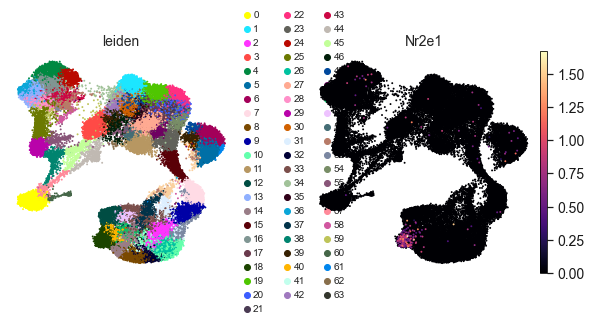

In [ ]:
sc.pl.umap(adata, color=['leiden', 'Nr2e1'], size=15, frameon=False, color_map='magma', legend_fontsize=10, save='8_5__1_full.pdf')  # Change the fontsize here


In [ ]:
adata.obs['leiden1'] = adata.obs['leiden']

In [ ]:
adata.obs.head(2)

,cell_id,x_centroid,y_centroid,transcript_counts,control_probe_counts,control_codeword_counts,unassigned_codeword_counts,deprecated_codeword_counts,total_counts,cell_area,...,cell_id_duplicate,n_genes_by_counts,log1p_n_genes_by_counts,log1p_total_counts,pct_counts_in_top_10_genes,pct_counts_in_top_20_genes,pct_counts_in_top_30_genes,pct_counts_in_top_40_genes,leiden,leiden1
aaacfglh-1,8_5_region1_aaacfglh-1,338.520416,1579.328491,38,0,0,0,0,38.0,91.035003,...,8_5_region1_aaacfglh-1,26,3.295837,3.663562,57.894737,84.210526,100.000000,100.000000,28,28
aaaejaei-1,8_5_region1_aaaejaei-1,344.911743,1594.985962,108,0,0,0,0,108.0,97.447191,...,8_5_region1_aaaejaei-1,48,3.891820,4.691348,42.592593,67.592593,83.333333,92.592593,7,7


/home/julia/miniconda3/envs/stlearn_Xenium/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


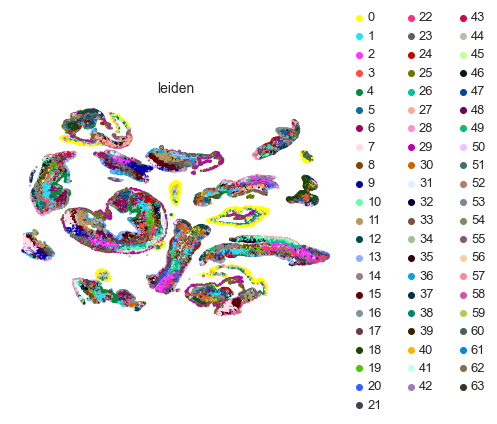

In [ ]:
sc.pl.embedding(adata, basis="X_spatial", color=['leiden'], frameon=False,s=20 , #save='8_5_spatial_full.svg'
               )

In [ ]:
adata1=adata.copy()

In [ ]:
cluster_df = pd.read_csv('/home/julia/Xenioum/clusters_table/Slice_1__8_5_annotation.csv', sep=';')
cluster_df.head()

,Clusters,name
0,0,Extraembryonic mesenchyme
1,1,Mesenchyme cranial
2,2,CNS ventral neural tube
3,3,Ednothelium of major body vessels
4,4,Ectoderm placodes epibranchial


In [ ]:
new_cluster_names=cluster_df['name'].to_list()
new_cluster_names

['Extraembryonic mesenchyme',
 'Mesenchyme cranial',
 'CNS ventral neural tube',
 'Ednothelium of major body vessels',
 'Ectoderm placodes epibranchial',
 'Neural crest cranial',
 'Neural crest branchial arches',
 'Mesoderm caudal',
 'CNS mid neural tube',
 'Mesoderm caudal',
 'CNS dorsal neural tube',
 'Hindgut',
 'CNS dorsal hindbrain midbrain neural folds',
 'Epithelium ventra body',
 'CNS hindbrain',
 'Mesoderm caudal',
 'Ectoderm placodal epibranchial',
 'Somites',
 'CNS forebrain neural folds',
 'Somites',
 'Somites',
 'Somites',
 'Somites',
 'Mesoderm caudal',
 'Ectoderm placodes epibranchial and forebrain',
 'Ectoderm head and neck',
 'CNS neural tube',
 'Cardiac mesenchyme',
 'Epithelium dorsal',
 'Extraembryonic mesenchyme',
 'Mesenchyme cranial',
 'Neural crest trunk',
 'CNS neural tube',
 'Ectoderm lateral next to neural crest',
 'Mesenchyme ventral interstitial',
 'Mesenchyme ventral and limb bud',
 'Epithelium caudal',
 'Neural crest premigratory cranial',
 'Extraembryoni

In [ ]:
from collections import defaultdict
# Dictionary to count occurrences
name_counter = defaultdict(int)

# Result list with modified names
unique_cluster_names = []

for name in new_cluster_names:
    name_counter[name] += 1
    if name_counter[name] == 1:
        unique_cluster_names.append(name)
    else:
        unique_cluster_names.append(f"{name}_{name_counter[name]}")

# Output the new list
print(unique_cluster_names)

['Extraembryonic mesenchyme', 'Mesenchyme cranial', 'CNS ventral neural tube', 'Ednothelium of major body vessels', 'Ectoderm placodes epibranchial', 'Neural crest cranial', 'Neural crest branchial arches', 'Mesoderm caudal', 'CNS mid neural tube', 'Mesoderm caudal_2', 'CNS dorsal neural tube', 'Hindgut', 'CNS dorsal hindbrain midbrain neural folds', 'Epithelium ventra body', 'CNS hindbrain', 'Mesoderm caudal_3', 'Ectoderm placodal epibranchial', 'Somites', 'CNS forebrain neural folds', 'Somites_2', 'Somites_3', 'Somites_4', 'Somites_5', 'Mesoderm caudal_4', 'Ectoderm placodes epibranchial and forebrain', 'Ectoderm head and neck', 'CNS neural tube', 'Cardiac mesenchyme', 'Epithelium dorsal', 'Extraembryonic mesenchyme_2', 'Mesenchyme cranial_2', 'Neural crest trunk', 'CNS neural tube_2', 'Ectoderm lateral next to neural crest', 'Mesenchyme ventral interstitial', 'Mesenchyme ventral and limb bud', 'Epithelium caudal', 'Neural crest premigratory cranial', 'Extraembryonic mesenchyme_3', '

In [ ]:
adata1.rename_categories("leiden", unique_cluster_names)

/home/julia/miniconda3/envs/stlearn_Xenium/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


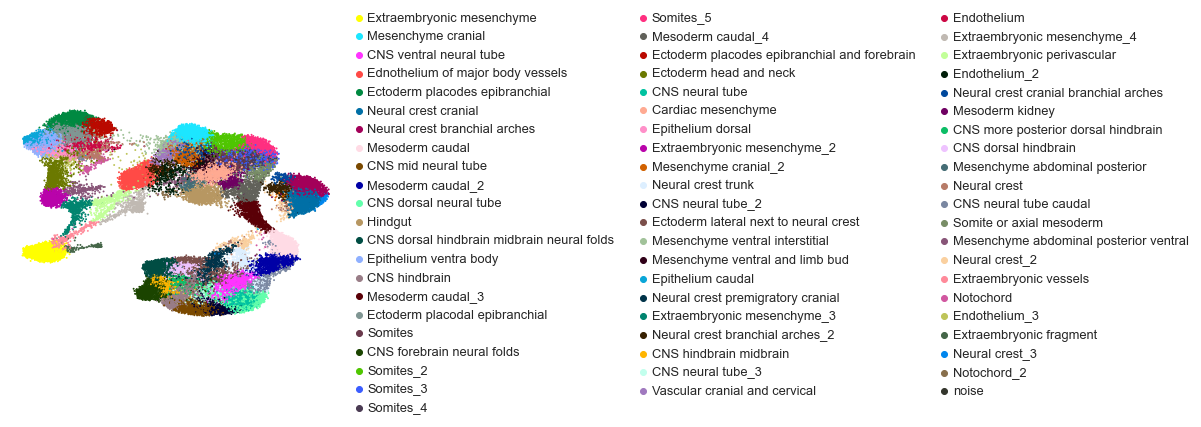

In [ ]:
sc.pl.umap( adata1, color="leiden", title="", frameon=False, size=15, #save="annotat_8_5_1.svg"
)

/home/julia/miniconda3/envs/stlearn_Xenium/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


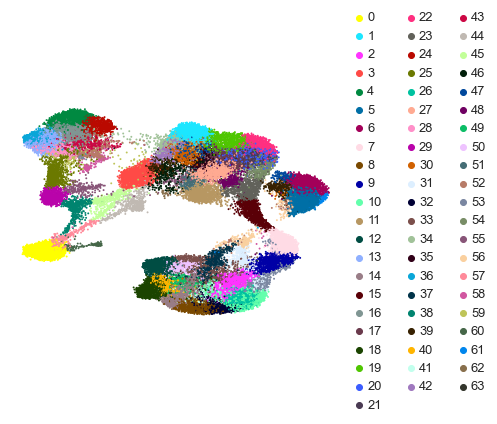

In [ ]:
sc.pl.umap( adata1, color="leiden1", title="", frameon=False, size=15#,cmap='Reds' #save="Epcam_8_5_1.svg"
)

In [ ]:
adata1.write_h5ad('/home/julia/Xenioum/h5ad/Sice_1_all_annotation_for_paper.h5ad')

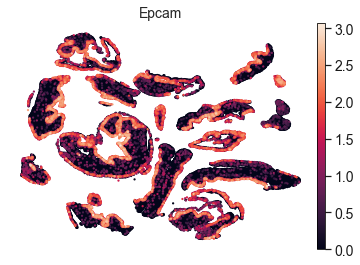

In [ ]:
sc.pl.embedding(adata1, basis="X_spatial", color=['Epcam'], frameon=False,s=20 , #save='Epcam_8_5.svg'
               )

In [ ]:
adata1_ep=adata[adata.obs['leiden'].isin(['4','24','16','36','13','28', '59','43', '52','58', '25'])]

In [ ]:
adata1_ep

View of AnnData object with n_obs × n_vars = 8152 × 347
    obs: 'cell_id', 'x_centroid', 'y_centroid', 'transcript_counts', 'control_probe_counts', 'control_codeword_counts', 'unassigned_codeword_counts', 'deprecated_codeword_counts', 'total_counts', 'cell_area', 'nucleus_area', 'region', 'EmbryonicDay_8_5', 'cell_id_duplicate', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'log1p_total_counts', 'pct_counts_in_top_10_genes', 'pct_counts_in_top_20_genes', 'pct_counts_in_top_30_genes', 'pct_counts_in_top_40_genes', 'leiden', 'leiden1'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'
    uns: 'leiden', 'leiden_colors', 'log1p', 'neighbors', 'pca', 'umap'
    obsm: 'X_pca', 'X_spatial', 'X_umap', 'spatial'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [ ]:
adata1_ep.raw = adata1_ep
sc.pp.normalize_total(adata1_ep, inplace=True) # Normalize counts per cell
sc.pp.log1p(adata1_ep) # Logarithmize
sc.pp.pca(adata1_ep, n_comps=90) # do principal component analysis
sc.pp.neighbors(adata1_ep, n_neighbors=45, n_pcs=80) # compute a neighborhood graph
sc.tl.umap(adata1_ep) # embed the neighborhood graph of the data
sc.tl.leiden(adata1_ep, resolution=2.5) # cluster the cells into subgroups


In [ ]:
sc.settings.set_figure_params(dpi=70)

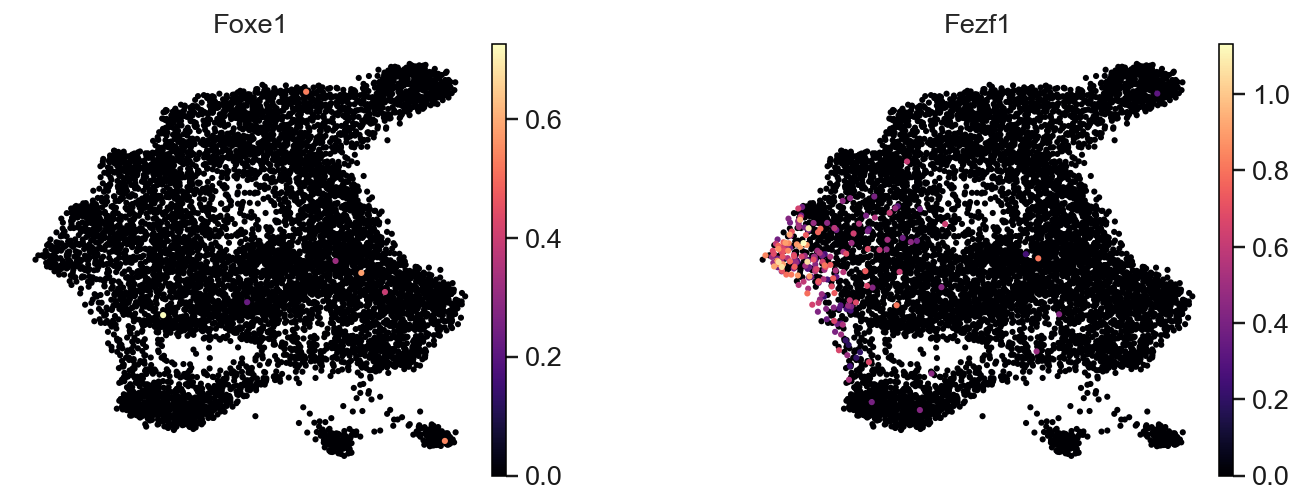

In [ ]:
sc.pl.umap(adata1_ep, color=[   'Foxe1' , 'Fezf1'], legend_loc='on data', wspace=0.4, frameon=False, size=40, color_map='magma')

/home/julia/miniconda3/envs/stlearn_Xenium/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


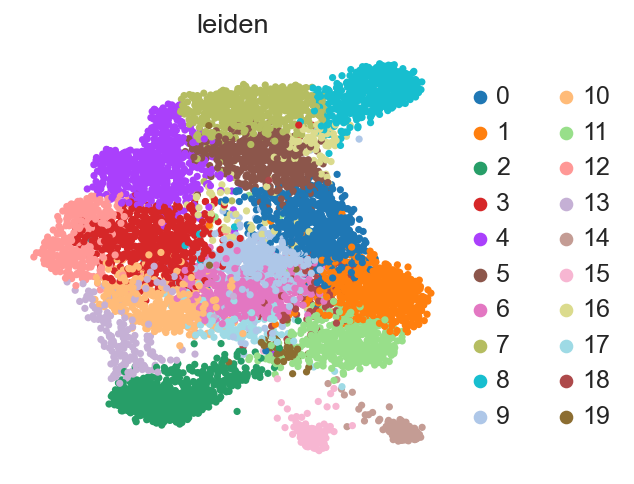

In [ ]:
sc.pl.umap(adata1_ep, color=[   'leiden'],  wspace=0.4, frameon=False, size=55, color_map='magma')

/home/julia/miniconda3/envs/stlearn_Xenium/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


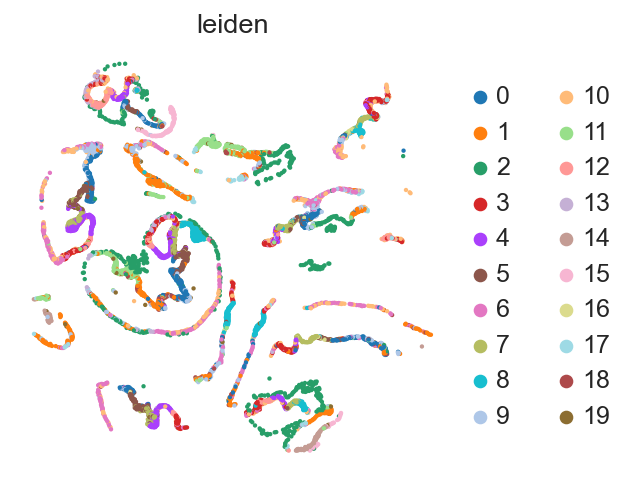

In [ ]:
sc.pl.embedding( adata1_ep, basis='X_spatial',color='leiden', size=20,frameon=False,#save='8_5_EPCAM_spatial_reclast_1.svg'
   )

In [ ]:
adata1_ep_copy=adata1_ep.copy()

In [ ]:
cluster_df1 = pd.read_csv('/home/julia/Xenioum/8_5__EPCAM_clusters/Slice1_EPCAM__8_5.csv', sep=';')
cluster_df1.head()

,clusters,name
0,0,epithelium abdominal
1,1,extraenbryonic
2,2,epithelium caudal
3,3,trigeminal
4,4,ectoderm mandibular epibranchial


In [ ]:
cluster_df1=cluster_df1.iloc[:-1]
cluster_df1

,clusters,name
0,0,epithelium abdominal
1,1,extraenbryonic
2,2,epithelium caudal
3,3,trigeminal
4,4,ectoderm mandibular epibranchial
5,5,epithelium abdominal
6,6,epibranchial placodes
7,7,otic
8,8,cns dorsal neural tube
9,9,predermal mesenchyme


In [ ]:
new_cluster_names2=cluster_df1['name'].to_list()
new_cluster_names2

['epithelium abdominal',
 'extraenbryonic',
 'epithelium caudal',
 'trigeminal',
 'ectoderm mandibular epibranchial',
 'epithelium abdominal',
 'epibranchial placodes',
 'otic',
 'cns dorsal neural tube',
 'predermal mesenchyme',
 'epithelium caudal',
 'neural crest',
 'olfactory',
 'lens',
 'neural crest',
 'extraembryonic',
 'extraembryonic',
 'ectoderm epibranchial',
 'epithelium abdominal',
 'noise']

In [ ]:
from collections import defaultdict

# Пример: входной список имён (может быть повторяющимся)
# Если у тебя уже есть new_cluster_names2 — просто используй его
# new_cluster_names2 = list(cluster_df1['name'])  # если берёшь из DataFrame

# Шаг 1: создаём счётчик повторений и список уникальных имён
name_counter = defaultdict(int)         # словарь для подсчёта повторений
unique_cluster_names = []               # финальный список уникальных имён

# Шаг 2: проходим по каждому имени в списке
for name in new_cluster_names2:
    count = name_counter[name]          # сколько раз имя уже встречалось
    if count == 0:
        unique_cluster_names.append(name)       # первое вхождение — без суффикса
    else:
        unique_cluster_names.append(f"{name}_{count}")  # повтор — добавляем суффикс
    name_counter[name] += 1             # увеличиваем счётчик

# Шаг 3: обновляем DataFrame
cluster_df1['name'] = unique_cluster_names



In [ ]:
cluster_df1

,clusters,name
0,0,epithelium abdominal
1,1,extraenbryonic
2,2,epithelium caudal
3,3,trigeminal
4,4,ectoderm mandibular epibranchial
5,5,epithelium abdominal_1
6,6,epibranchial placodes
7,7,otic
8,8,cns dorsal neural tube
9,9,predermal mesenchyme


In [ ]:
cluster_annotations = dict(zip(cluster_df1['clusters'].astype(str), cluster_df1['name']))

In [ ]:
cluster_annotations

{'0': 'epithelium abdominal',
 '1': 'extraenbryonic',
 '2': 'epithelium caudal',
 '3': 'trigeminal',
 '4': 'ectoderm mandibular epibranchial',
 '5': 'epithelium abdominal_1',
 '6': 'epibranchial placodes',
 '7': 'otic',
 '8': 'cns dorsal neural tube',
 '9': 'predermal mesenchyme',
 '10': 'epithelium caudal_1',
 '11': 'neural crest',
 '12': 'olfactory',
 '13': 'lens',
 '14': 'neural crest_1',
 '15': 'extraembryonic',
 '16': 'extraembryonic_1',
 '17': 'ectoderm epibranchial',
 '18': 'epithelium abdominal_2',
 '19': 'noise'}

In [ ]:
adata1_ep.obs.columns.tolist()

['cell_id',
 'x_centroid',
 'y_centroid',
 'transcript_counts',
 'control_probe_counts',
 'control_codeword_counts',
 'unassigned_codeword_counts',
 'deprecated_codeword_counts',
 'total_counts',
 'cell_area',
 'nucleus_area',
 'region',
 'EmbryonicDay_8_5',
 'cell_id_duplicate',
 'n_genes_by_counts',
 'log1p_n_genes_by_counts',
 'log1p_total_counts',
 'pct_counts_in_top_10_genes',
 'pct_counts_in_top_20_genes',
 'pct_counts_in_top_30_genes',
 'pct_counts_in_top_40_genes',
 'leiden',
 'leiden1']

/home/julia/miniconda3/envs/stlearn_Xenium/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


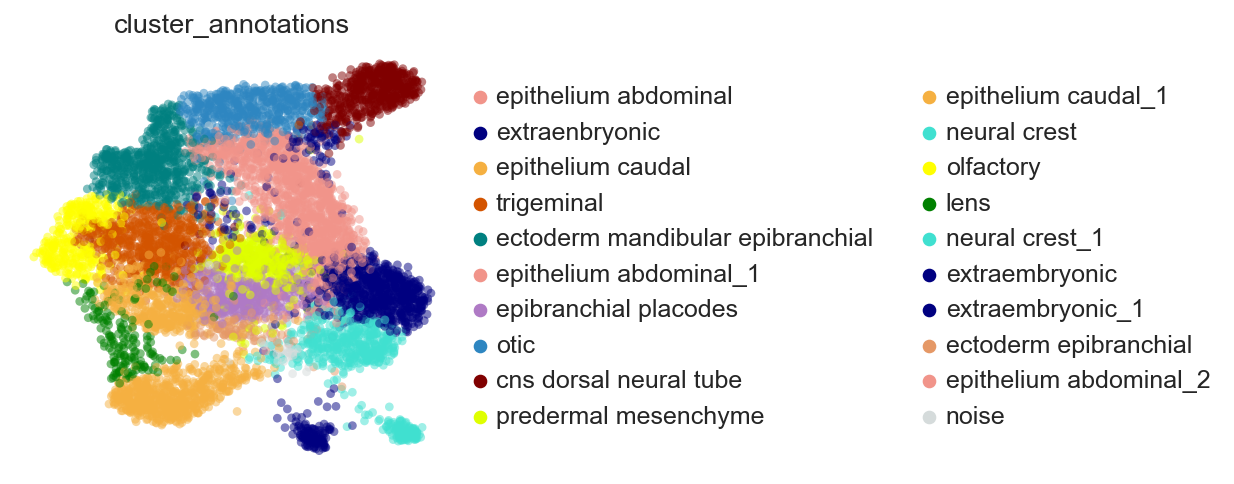

In [ ]:
# Map annotations to clusters
adata1_ep.obs['cluster_annotations'] = adata1_ep.obs['leiden'].map(cluster_annotations)

# Convert to categorical dtype
adata1_ep.obs['cluster_annotations'] = adata1_ep.obs['cluster_annotations'].astype('category')

# Define the highlight colors
highlight_colors = {

 'epithelium abdominal': '#f1948a',
 'epithelium abdominal':'#f1948a',
'epithelium caudal':'#f5b041',
    'extraenbryonic':'#000080',
    'trigeminal':'#d35400',

'ectoderm mandibular epibranchial':'#008080',
  'epithelium abdominal_1':'#f1948a',
'epibranchial placodes': '#af7ac5',
 'otic':'#2e86c1',
 'cns dorsal neural tube':'#800000',
  'predermal mesenchyme':'#DFFF00',
'epithelium caudal_1':'#f5b041',
'neural crest':'#40E0D0',
 'olfactory': 'yellow',
 #'lens': '#a569bd',
    'lens': 'green',
 'neural crest_1': '#40E0D0',
'extraembryonic':'#000080',
 'extraembryonic_1':'#000080',
 'ectoderm epibranchial': '#e59866',
'epithelium abdominal_2':'#f1948a',
'noise':'#d5dbdb',
      'adenohypophyseal': 'blue',
    'epibranchial': '#7d3c98',
        'otic':'#2e86c1',}

adata1_ep.uns['cluster_annotations_colors'] = [
    highlight_colors[cat] if cat in highlight_colors else 'lightgray'
    for cat in adata1_ep.obs['cluster_annotations'].cat.categories]

sc.pl.umap(
    adata1_ep,
    color='cluster_annotations', frameon=False,
    size=80,
    alpha=0.5,
   # save='epcam_all4.pdf'
)



In [ ]:
# Create mapping: leiden cluster → annotation
leiden_to_annotation = adata1_ep.obs.groupby('leiden')['cluster_annotations'].agg(lambda x: x.mode()[0])

# Create a color map for leiden using the annotation colors
leiden_colors = [
    highlight_colors.get(leiden_to_annotation[str(i)], 'lightgray')
    for i in adata1_ep.obs['leiden'].cat.categories
]

# Assign to uns
adata1_ep.uns['leiden_colors'] = leiden_colors


/home/julia/miniconda3/envs/stlearn_Xenium/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


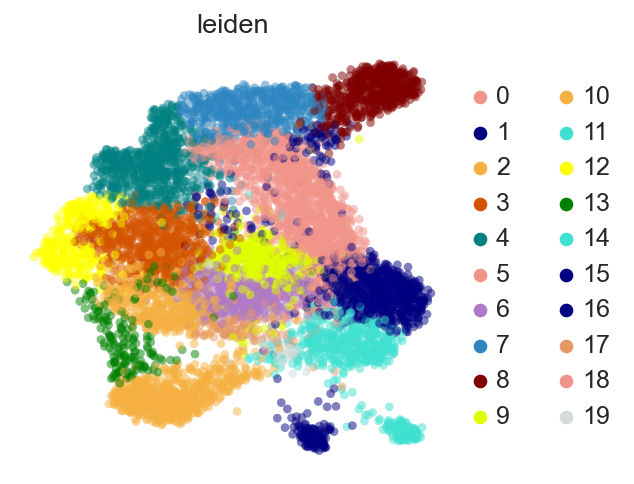

In [ ]:
sc.pl.umap(
    adata1_ep,
    color='leiden',
    frameon=False,
    size=80,
    alpha=0.5,# save='__Epcam_all_clusters_leiden.svg'
)


/home/julia/miniconda3/envs/stlearn_Xenium/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


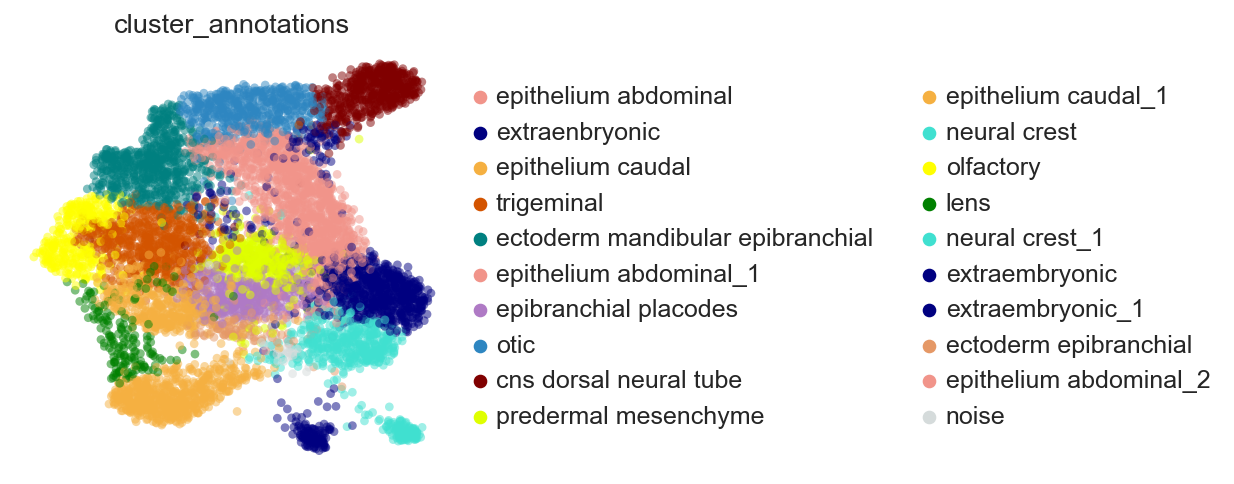

In [ ]:
# Plot the UMAP with custom colors
sc.pl.umap(
    adata1_ep,
    color='cluster_annotations',
    frameon=False,
    size=80,
    alpha=0.5,
 # save='epcam_UMAP_full_annotations.svg'
)


/home/julia/miniconda3/envs/stlearn_Xenium/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


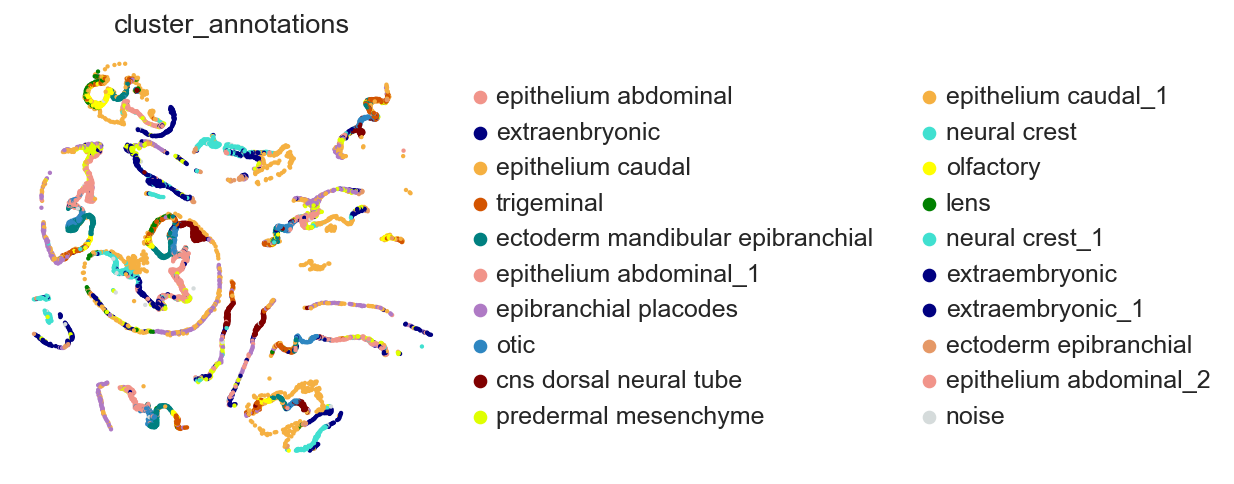

In [ ]:
sc.pl.embedding(
    adata1_ep,
    basis='X_spatial',
   color='cluster_annotations',
    size=20,
    frameon=False, # save='8_5_EPCAM_spatial_FULL_annotation.svg'

)

In [ ]:
adata1_ep.write_h5ad('slice1_EPCAM_annotat.h5ad')

In [ ]:
adata1_ep2=adata1_ep.copy()

/home/julia/miniconda3/envs/stlearn_Xenium/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


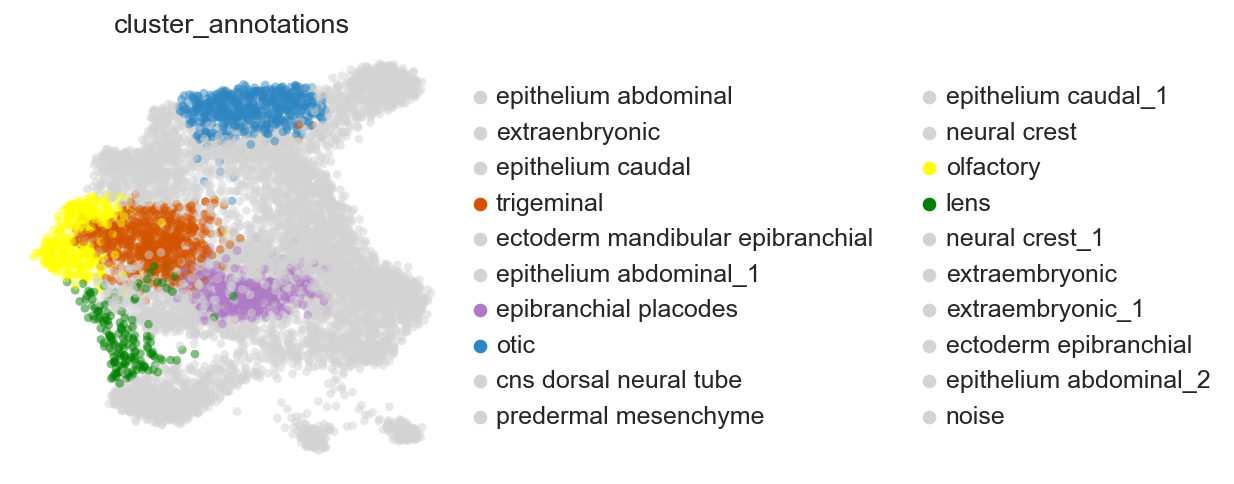

In [ ]:
# Map annotations to clusters
adata1_ep2.obs['cluster_annotations'] = adata1_ep2.obs['leiden'].map(cluster_annotations)
# Convert to categorical dtype
adata1_ep2.obs['cluster_annotations'] = adata1_ep2.obs['cluster_annotations'].astype('category')
# Define the highlight colors
highlight_colors = {
'epithelium abdominal': 'lightgray',
'epithelium abdominal':'lightgray',
'epithelium caudal':'lightgray',
'extraenbryonic':'lightgray',
'trigeminal':'#d35400',
'ectoderm mandibular epibranchial':'lightgray',
'epithelium abdominal_1':'lightgray',
'epibranchial placodes': '#af7ac5',
'otic':'#2e86c1',
'cns dorsal neural tube':'lightgray',
'predermal mesenchyme':'lightgray',
'epithelium caudal_1':'lightgray',
'neural crest':'lightgray',
'olfactory': 'yellow',
'lens': 'green',
'neural crest_1': 'lightgray',
'extraembryonic':'lightgray',
'extraembryonic_1':'lightgray',
'ectoderm epibranchial': 'lightgray',
'epithelium abdominal_2':'lightgray',
'noise':'lightgray',
'adenohypophyseal': 'blue',
'epibranchial': '#7d3c98',
}
adata1_ep2.uns['cluster_annotations_colors'] = [
    highlight_colors[cat] if cat in highlight_colors else 'lightgray'
    for cat in adata1_ep2.obs['cluster_annotations'].cat.categories]
sc.pl.umap( adata1_ep2,color='cluster_annotations',frameon=False, size=80, alpha=0.5,)

/home/julia/miniconda3/envs/stlearn_Xenium/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


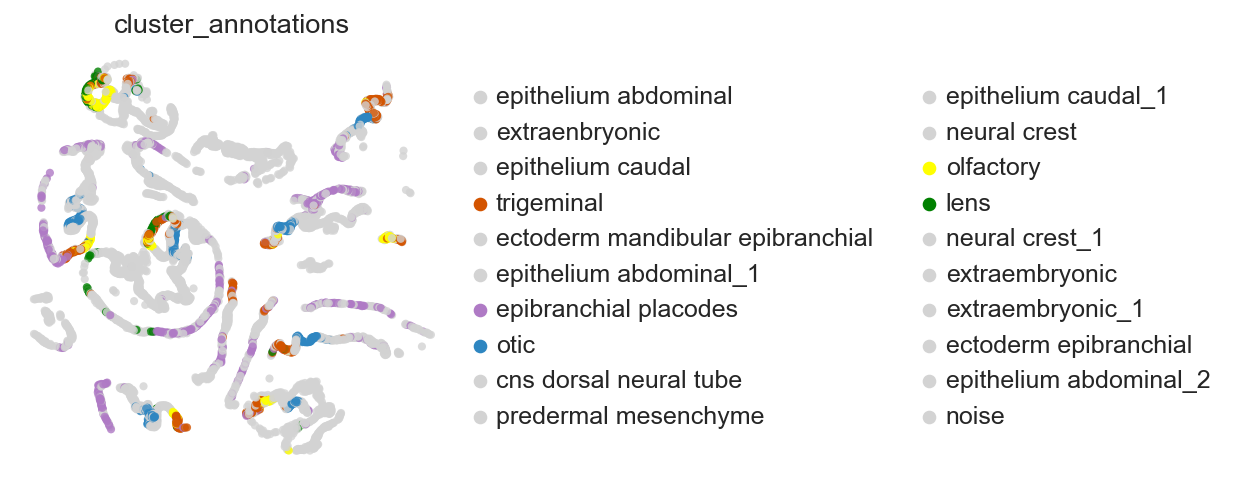

In [ ]:
sc.pl.embedding(adata1_ep2, basis="X_spatial", color=['cluster_annotations'], frameon=False,s=70 , alpha=0.8, #save='8_5_spatial_full.pdf'
               )